<a href="https://colab.research.google.com/github/hanokjoshua144/Machine-Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def euclidean_distance(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

def manhattan_distance(x, y):
  return np.sum(np.abs(x - y))

def cosine_similarity(x, y):
  dot_product = np.dot(x, y)
  norm_x = np.linalg.norm(x)
  norm_y = np.linalg.norm(y)
  return dot_product / (norm_x * norm_y)

def jaccard_similarity(x, y):
  # Assume x and y are binary vectors (0 or 1)
  intersection = np.sum(np.minimum(x, y))
  union = np.sum(np.maximum(x, y))
  return intersection / union

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

print("Euclidean Distance:", euclidean_distance(x, y))
print("Manhattan Distance:", manhattan_distance(x, y))
print("Cosine Similarity:", cosine_similarity(x, y))

# For Jaccard similarity, use binary vectors
a = np.array([1, 0, 1, 1])
b = np.array([0, 1, 1, 0])
print("Jaccard Similarity:", jaccard_similarity(a, b))

Euclidean Distance: 5.196152422706632
Manhattan Distance: 9
Cosine Similarity: 0.9746318461970762
Jaccard Similarity: 0.25


[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


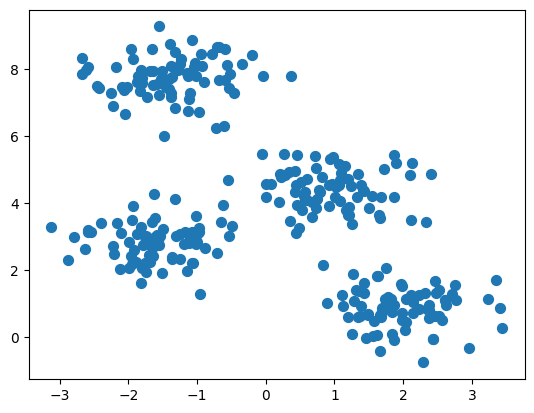

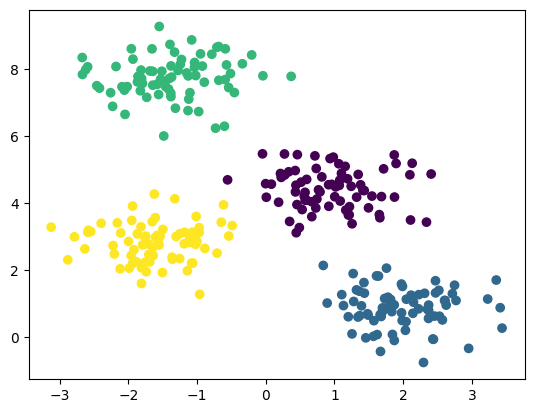

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
print(y)

# Plot the generated data
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

# Fit the KMeans model to the data
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10) # Added n_init to suppress warning
kmeans.fit(X)

# Predict the cluster labels
y_pred = kmeans.predict(X)

# Plot the resulting clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.show()

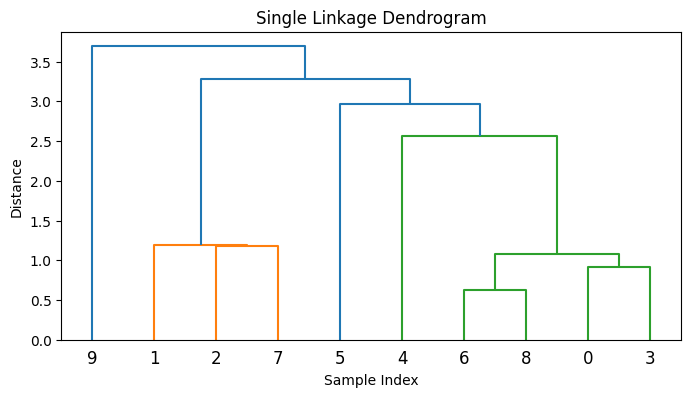

Cluster assignments: [2 1 1 2 2 2 2 1 2 3]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs

# Step 1: Create synthetic data
X, _ = make_blobs(n_samples=10, centers=4, random_state=0)

# Step 2: Perform single linkage clustering
Z = linkage(X, method='single') # 'single' for single linkage

# Step 3: Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=np.arange(len(X)))
plt.title('Single Linkage Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Optional: Extract flat clusters from the hierarchy
# Example: Get 3 clusters
clusters = fcluster(Z, t=3, criterion='maxclust') # Corrected t value for 3 clusters
print("Cluster assignments:", clusters)

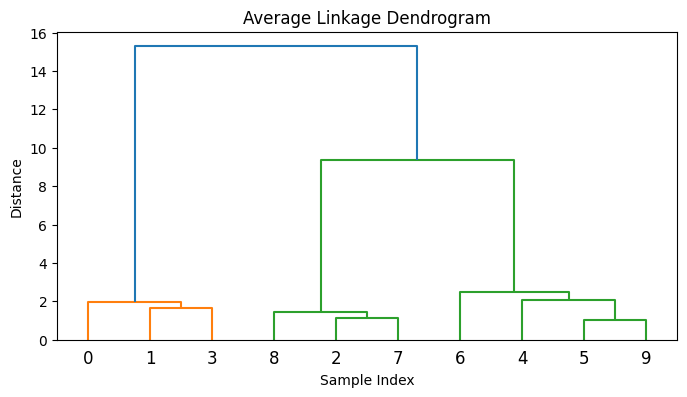

Average Linkage Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


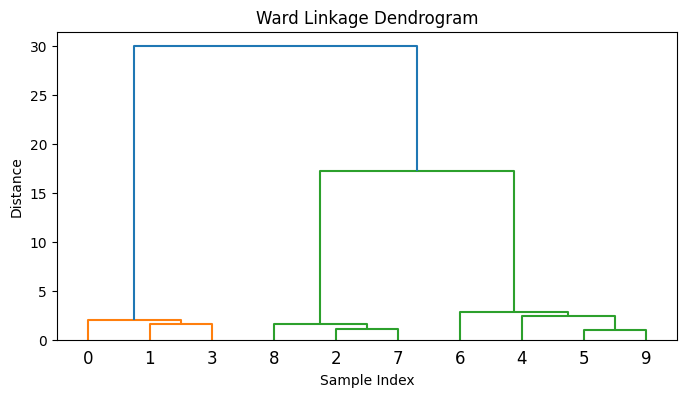

Ward Linkage Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

def plot_dendrogram(Z, title):
    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=np.arange(len(X)))
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Average Linkage
Z_avg = linkage(X, method='average')
plot_dendrogram(Z_avg, 'Average Linkage Dendrogram')

clusters_avg = fcluster(Z_avg, t=3, criterion='maxclust')
print("Average Linkage Cluster assignments:", clusters_avg)

# Ward Linkage
Z_ward = linkage(X, method='ward')
plot_dendrogram(Z_ward, 'Ward Linkage Dendrogram')

clusters_ward = fcluster(Z_ward, t=3, criterion='maxclust')
print("Ward Linkage Cluster assignments:", clusters_ward)

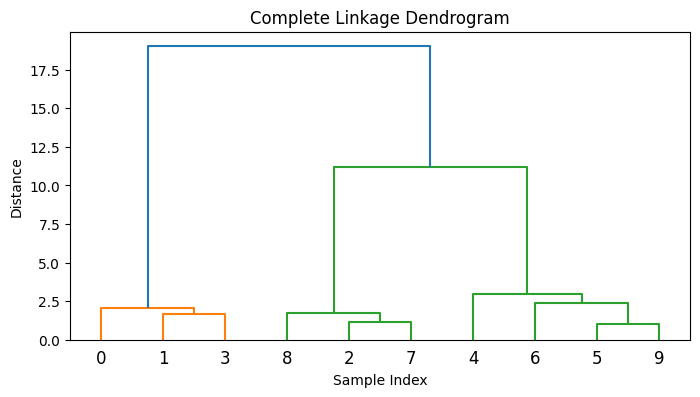

Cluster assignments: [1 1 2 1 3 3 3 2 2 3]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=10, centers=3, random_state=42)

# Step 2: Perform Complete Linkage clustering
Z = linkage(X, method='complete') # 'complete' for complete linkage

# Step 3: Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=np.arange(len(X)))
plt.title('Complete Linkage Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel("Distance")
plt.show()

# Step 4: Optionally extract clusters (e.g., 3 clusters)
clusters = fcluster(Z, t=3, criterion='maxclust')
print("Cluster assignments:", clusters)

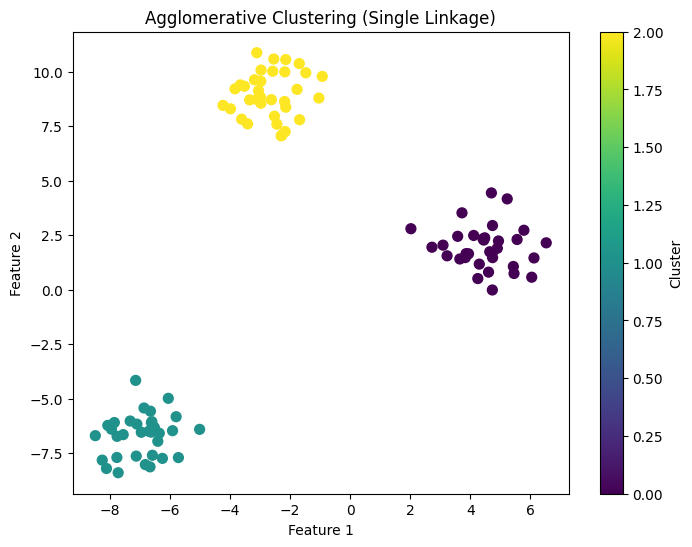

Cluster assignments: [1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Step 2: Perform Agglomerative Clustering with Single Linkage
# n_clusters: the number of clusters to find
# linkage: specifies the linkage criterion ('ward', 'complete', 'average', 'single')
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
clusters = agg_clustering.fit_predict(X)

# Step 3: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.title('Agglomerative Clustering (Single Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

print("Cluster assignments:", clusters)

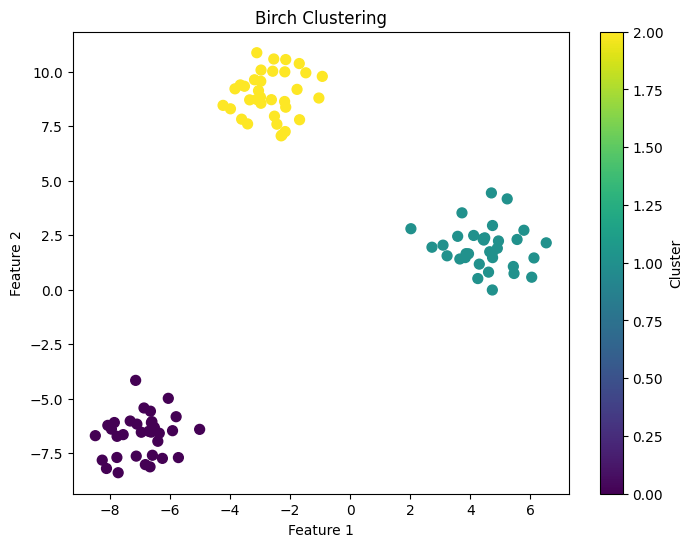

Cluster assignments: [0 1 2 1 0 1 2 1 1 2 2 0 0 2 2 0 0 2 0 0 2 0 0 2 2 2 1 0 0 0 0 1 1 0 2 2 2
 2 1 1 0 2 1 2 2 1 0 0 0 1 1 1 2 0 0 0 2 2 1 2 0 1 0 1 0 0 1 0 1 1 1 0 0 2
 1 0 1 0 1 1 2 1 2 0 2 2 2 1 2 1 1 1 2 1 2 2 2 1 0 2]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Step 2: Perform Birch Clustering
# threshold: The radius of the subcluster in the CF tree
# n_clusters: The number of clusters to find (optional, can be None)
birch = Birch(threshold=0.5, n_clusters=3)
birch.fit(X)
clusters = birch.predict(X)

# Step 3: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=50)
plt.title('Birch Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

print("Cluster assignments:", clusters)

Estimated number of clusters: 4
Estimated number of noise points: 47


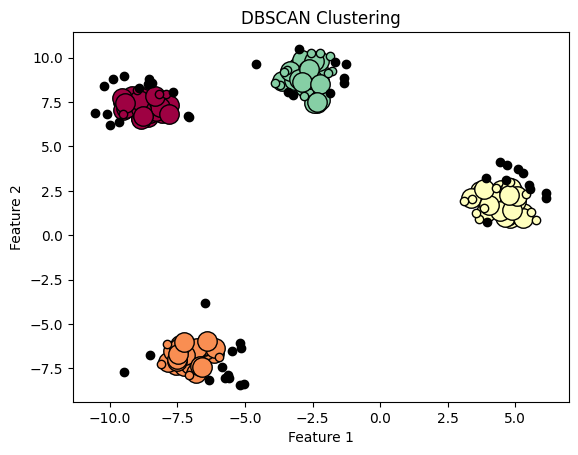

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
X, _ = make_blobs(n_samples=200, centers=4, random_state=42, cluster_std=0.8)

# Step 2: Perform DBSCAN clustering
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Step 3: Identify core, border, and noise points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Step 4: Visualize the results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # Plot non-core points (border points)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()